# Calcul Numérique TP5: Analyse en composante principale

L'objectif de ce TP est d'étudier l'Analyse en Composante Principale telle que vous l'avez vue en cours. Nous ferons également le lien avec les valeurs propres et vous manipulerez cette technique sur des données réelles.

### Exercice 1: Observation des données
Pour cette première partie, nous allons utiliser le jeu de données *iris* qui est classiquement utilisé pour les outils d'apprentissage automatique supervisés ou non-supervisés.

Ce jeu de données contient 150 fleurs classées en trois types d'iris. Ces fleurs sont caractérisées par 4 dimensions: la longueur et largeur du sépale, ainsi que la longueur et largeur du pétale. Nous allons étudier les contributions respectives de ces dimensions pour la catégorisation des types d'iris.

In [6]:
import numpy as np
from numpy import random as rdm
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

On définit une fonction qui prend en paramètre les valeurs de deux dimensions, ainsi que les étiquettes (ou labels) associées et trace le nuage de points en 2D.

In [1]:
#affichage du nuage de points en 2D
def nuage(x1, x2, y, dim1='dim1', dim2='dim2'):
    plt.scatter(x1, x2, c=y)
    plt.title('nuage de points')
    plt.xlabel(dim1)
    plt.ylabel(dim2)
    plt.show()



SyntaxError: invalid syntax (<ipython-input-1-a4c36b5fa1b4>, line 13)

1) Représenter les nuages de points en 2D en choisissant à chaque fois deux caractéristiques différentes des fleurs. Vous pourrez utiliser l'extrait de code ci-dessous en modifiant les indices correspondant aux caractéristiques.
- [ ] est-ce que vous observez des relations entre les différentes caractéristiques ? 
- [ ] est-ce que certaines semblent être plus importantes que d'autres pour discriminer les types d'iris ? 

nb d echantillon:  150
nb de dimensions:  4


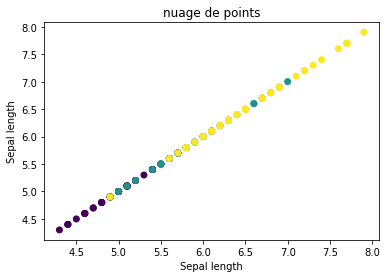

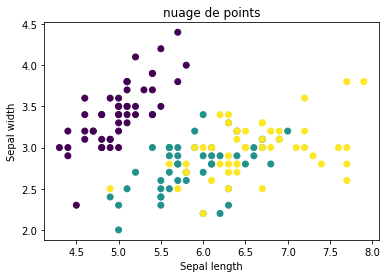

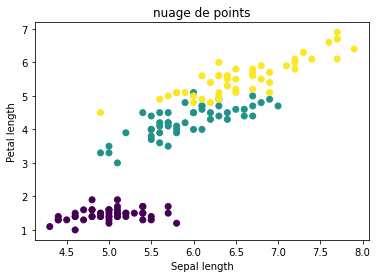

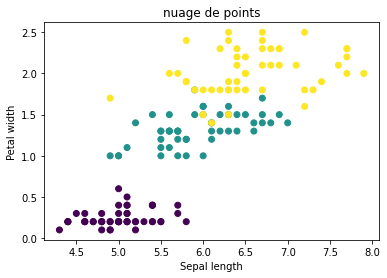

In [8]:
#recuperer le jeu de données iris qui contient plusieurs types d'iris (label) représenté chacun par 4 dimensions.
iris = datasets.load_iris()
X = iris.data
label = iris.target
dim = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
N,D = X.shape
print('nb d echantillon: ', N)
print('nb de dimensions: ', D)

nuage(X[:,0], X[:,0], label, dim[0], dim[0])
nuage(X[:,0], X[:,1], label, dim[0], dim[1])
nuage(X[:,0], X[:,2], label, dim[0], dim[2])
nuage(X[:,0], X[:,3], label, dim[0], dim[3])

Soit un vecteur représentant l'échantillon $i$, à $D$ dimensions (dans le cas des iris $D=4$ avec $N=150$ échantillons):
$$\mathbf{x}_i = (x_{i1}, x_{i2}, \ldots, x_{ij}, \ldots, x_{iD})$$

On rappelle pour la dimension $j$, les définitions de la moyenne $\bar{x_j}$, de la variance $\text{Var}(x_j)$ et de la covariance $\text{Cov}(x_j, x_k)$:
\begin{align*}
&\bar{x_j} = \dfrac{1}{N} \sum_{i=1}^N x_{ij}\\
&\text{Var}(x_j) = \left( \dfrac{1}{N} \sum_{i=1}^N x_{ij}^2 \right) - \bar{x_j}^2 \quad \text{et} \quad \sigma_j = \sqrt{\text{Var}(x_j)}\\
&\text{Cov}(x_j, x_k) = \left( \dfrac{1}{N} \sum_{i=1}^N x_{ij}x_{ik} \right) - \bar{x_j}\bar{x_k}
\end{align*}

2) Donner un exemple d'un tel vecteur.

3) Calculer ensuite les valeurs moyennes, variance et covariance sur l'ensemble des échantillons et pour les 4 dimensions.

4) Vous vérifierez que la diagonale de la matrice de variance-covariance, notée $C$, correspond bien aux valeurs de variance calculées. Si ce n'est pas le cas, lire attentivement la documentation numpy sur les fonctions `numpy.cov()` et `numpy.var()`

5) Déterminer la matrice de corrélation $R$ (corrélation entre les dimensions/caractéristiques), telle que 
$$r_{jk} = \rho(\bar{x_j}, \bar{x_k}) = \dfrac{\text{Cov}(x_j, x_k)}{\sigma_j \sigma_k}$$
- [ ] vérifier que votre matrice $R$ est bien symétrique et que vous avez bien des 1 sur la diagonale.

In [9]:
cov = [0]*4
moy = np.mean(X, axis= 0)
var = np.var(X, axis = 0, ddof = 1)
for i in range (4):
    cov[i] = np.cov(X[:, 1])
print(moy)
print(var)
print(cov)

[5.84333333 3.05733333 3.758      1.19933333]
[0.68569351 0.18997942 3.11627785 0.58100626]
[array(0.18997942), array(0.18997942), array(0.18997942), array(0.18997942)]


### Exercice 2: Calcul de l'inertie

L'objectif de l'analyse en composante principale est de représenter des échantillons sur de nouveaux axes, correspondant à des nouvelles caractéristiques, qui sont plus pertinentes pour discriminer les données. La question de la pertinence sera modélisée par une proximité à l'aide de la distance euclidienne.

Nous allons maintenant calculer la distance euclidienne entre deux échantillons (deux fleurs) sur les 4 dimensions. Puis dans un second temps, nous allons généraliser à la distance entre le centre de gravité et chacun des échantillons. Cela nous permettra d'avoir une valeur de l'inertie globale.

1) Soit deux échantillons (deux fleurs) $\mathbf{x}_i$ et $\mathbf{x}_k$. Calculer la distance euclidienne entre ces deux échantillons:
$$d^2(\mathbf{x}_i,\mathbf{x}_k) = \sum_{j=1}^D (x_{ij} - x_{kj})^2$$
Remarque: la distance entre deux échantillons identiques ($\mathbf{x}_i$ et $\mathbf{x}_i$) est nulle !

In [13]:
def calcul_distance(x1,x2):
    #x1 contient n1 échantillons et D dimensions, x2 contient n2 échantillons et D dimensions
    d = np.sum((x1 - x2) ** 2)
    return d

print(calcul_distance(X[1,:], X[10,:]))
#d = np.linalg.norm(X[1,:] - X[10,:])

0.7500000000000002


2) On appelle centre de gravité, le vecteur contenant l'ensemble des moyennes pour les $D$ dimensions. Nous avons déjà calculé ces moyennes et $\bar{\mathbf{x}} = (\bar{x_1}, \ldots, \bar{x_j}, \ldots, \bar{x_D})$. L'inertie totale est la moyenne des distances entre chacun des $N$ échantillons $\mathbf{x_i}$ (chaque fleurs) et le centre de gravité.
Calculer l'inertie totale.
$$I_g = \dfrac{1}{N} \sum_{i=1}^N d^2(\mathbf{x}_i, \bar{\mathbf{x}})$$

In [ ]:
#calcul de l'inertie totale:


3) Que se passe-t-il si les données sont normalisées ? c'est-à-dire que chaque valeur de chaque échantillon $i$ sera normalisé par la moyenne calculée sur la dimension $j$ et l'écart-type $\sigma_j = \sqrt{\text{Var}(x_j)}$:
\begin{equation}
xn_{ij} = \dfrac{x_{ij} - \bar{x_j}}{\sigma_j}
\end{equation}
- [ ] vérifier que le nouveau vecteur de moyennes devrait être nul et le nouveau vecteur d'écart-type doit être égal à 1.
- [ ] dans le cas où les données d'entrée sont normalisées, l'inertie totale doit être égale au nombre de dimension (soit 4 dans notre cas).

### Exercice 3: Calcul des valeurs et vecteurs propres

Nous allons à présent calculer les composantes principales. Pour cela, deux méthodes peuvent être utilisées:
- la recherche itérative des axes permettant de conserver un maximum d'inertie,
- l'utilisation des valeurs propres.
Nous allons utiliser la seconde méthode.

**Rappels:** Soit une matrice $A$ carrée de dimension $(n \times n)$, les valeurs propres de $A$ sont les scalaires $\lambda$ tels que $\text{det}(A - \lambda I_n) = 0$ avec $I_n$ la matrice identité de dimension $n$.
Le vecteur propre $X$ associé à la valeur propre $\lambda$ vérifie la relation: $$AX = \lambda X$$

1) Soit la matrice $A$ suivante.
\begin{equation}
A = \begin{pmatrix} 5 & -3 \\ 6 & -4 \end{pmatrix} 
\end{equation}
- [ ] Déterminer ses valeurs propres.
- [ ] Déterminer ses vecteurs propres.

**Théorème:** Si une matrice $A$ carrée de dimension $n$ possède $n$ valeurs propres distinctes, alors elle est diagonalisable. De plus, une matrice symétrique est toujours diagonalisable, c'est-à-dire qu'elle peut s'écrire avec $D$ la matrice diagonale, et $P$ la matrice de passage.
$$A = P^{-1} D P$$

Soit une matrice $A$ carrée symétrique de dimension $n$, elle est diagonalisable Soit $\lambda_k$ les valeurs propres et $X_k$ les vecteurs propres associés de la matrice $A$, alors la matrice diagonale $D$ s'exprime en fonction des valeurs propres de $A$ et la matrice de passage s'exprime en fonction des vecteurs propres associés.
\begin{equation*}
D = \begin{pmatrix}
\lambda_1 & 0 & \ldots & 0\\
0 & \lambda_2 & \ldots & 0\\
\vdots & & \ddots & \vdots\\
0 & 0 & \ldots & \lambda_n
\end{pmatrix}
\quad \text{et} \quad 
P = \begin{pmatrix} X_1 & X_2 & \ldots & X_n
\end{pmatrix}
\end{equation*}
Remarque: la matrice de passage permet de faire un changement de base. C'est-à-dire que les dimensions de $A$ vont représenter par exemple les caractéristiques des fleurs, tandis que les dimensions de $D$ ($A$ représentée dans la nouvelle base) seront différentes.

2) Donner la matrice diagonale de *A*, ainsi que la matrice de passage *P*.

Revenons au problème de l'analyse en composante principales. La matrice de variance-covariance $C$ (et la matrice de corrélation $R$) est symétrique donc diagonalisable. Pour calculer ses valeurs propres, il faut résoudre le système suivant qui est un système à 4 équations.
$$\text{det}(C - \lambda I_4) = 0$$
Pour se faire, nous allons utiliser la fonction `numpy.linalg.eig(A)` qui retourne les valeurs propres et les vecteurs propres d'une matrice *A*

3) Donner les valeurs propres et vecteurs propres de la matrice *C* puis de *R*.

4) On montre que les inerties obtenues suivant chacun des nouveaux axes sont les valeurs propres de *R* classées par ordre décroissant. Calculer la somme des inerties locales et comparer avec l'inertie globale.

5) Calculer les contributions de chacun des axes: rapport entre inertie locale et globale.

6) Nous obtenons donc 4 nouveaux axes, correspondant à des combinaisons linéaires des caractéristiques initiales des fleurs. Selon vous quel est l'axe qui représente le mieux ces caractéristiques ?

7) Nous souhaitons à présent obtenir les coordonnées de chaque échantillon (ou fleur) sur les nouveaux axes. Nous utilisons pour cela la matrice de passage *P* formée de l'ensemble des vecteurs propres. 
- [ ] Donner la matrice *P*. Cette matrice de vecteur propres (ou matrice de passage) est très importante pour l'interprétation. En effet, elle nous indique les contributions de chaque caractéristique d'origine sur le nouvel axe.

Par exemple, vous devriez trouver pour la première ligne de *P* les valeurs suivantes: 

`0.52237162 -0.37231836 -0.72101681  0.2619955`

Cela veut dire que le nouvel axe $$c_1 = 0.52 x_1 -0.37 x_2 -0.72 x_3 + 0.26 x_4$$

- [ ] Indiquer alors pour chaque nouvel axe $c_j$ quelles sont les caractéristiques des fleurs qui contribuent le plus

In [ ]:
lamb, P = np.linalg.eig(cov)
print(lamb)
print(P)
print('inertie globale: ', inertie)
print('somme des inerties locales: ', np.sum(lamb))
print('\n')
print(lamb/inertie)

8) Projetez vos données d'origine dans la nouvelle base (sur les nouveaux axes), pour cela, une simple opération matricielle est nécessaire. Et représenter les données sous forme d'un nuage de points sur les axes principaux.

In [ ]:
#on projete les valeurs X dans la nouvelle base


On remarque que l'axe 0 permet de mieux discriminer les différents types de fleurs.

### Exercice 4: Faire une PCA avec scikit-learn

Nous allons utiliser la famille de fonctions contenue dans le paquet PCA de scikit-learn. Pour cela commencez par lire la documentation en ligne: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.

1) Ensuite importer le toolkit et tester les lignes suivantes avec `X` votre variable contenant les données.
- [ ] expliquez à quoi correspond la variable `pca`.
- [ ] à quoi correspond la valeur de 2 `nb_components =2`? Ce choix est-il pertinent au vu de nos données ?
- [ ] représenter les données sous forme d'un nuage de points dans le plan formé par les nouveaux axes. Comparer avec la représentation obtenue précédemment, vous devriez observer la même chose.

(150, 2)


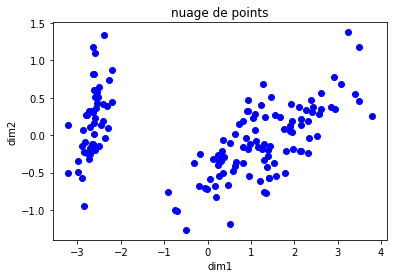

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver= 'arpack')
xp = pca.fit_transform(X)   # Sortie du modèle dans une autre bases
print(xp.shape)
nuage(xp[:,0], xp[:,1], 'blue')

2) Observer les valeurs obtenues avec les attributs suivants, et faites le lien avec ce que vous avez trouvé aux questions précédentes.
```
pca.explained_variance_ratio_
pca.explained_variance_
pca.components_
```

In [18]:
print(pca.explained_variance_ratio_) 
print(pca.explained_variance_)
print(pca.components_)

[0.92461872 0.05306648]
[4.22824171 0.24267075]
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
